In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Data Science Jobs 2024.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,URL
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-ana...
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-sci...
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-sci...
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-eng...
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),https://www.glassdoor.com/job-listing/data-sci...


<h3>Things to do</h3>
<br>. Salary
<br>. Location
<br>. Job Title
<br>. Job Description
<br>. Industry
<br>. Ownership type 

In [3]:
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
URL                  0
dtype: int64

# Salary

In [4]:
Salary=df['Salary Estimate']
EmployeerEstimate=Salary.apply(lambda x: 1 if x.find("Employer est.")!=-1 else 0)
GlassdoorEstimate=Salary.apply(lambda x: 1 if x.find("Glassdoor est.")!=-1 else 0)
df["Glassdoor Estimate"]=GlassdoorEstimate
df["Employeer Estimate"]=EmployeerEstimate

In [5]:
SalaryTypeRemoved=Salary.apply(lambda x: x.split('(')[0])

In [6]:
SalaryTypeRemoved

0      $38.00 - $45.00 Per Hour 
1                 $120K - $130K 
2      $66.82 - $80.54 Per Hour 
3                 $105K - $160K 
4                  $84K - $109K 
                 ...            
713               $148K - $237K 
714               $194K - $355K 
715                 $63K - $98K 
716    $48.19 - $75.93 Per Hour 
717                        $84K 
Name: Salary Estimate, Length: 718, dtype: object

In [7]:
PerHourSalary=SalaryTypeRemoved.apply(lambda x: 1 if x.find('Per Hour')!=-1 else 0)
df["Per Hour"]=PerHourSalary

In [8]:
#PerHourAndSalaryTypeRemoved=
PerHourAndSalaryTypeRemoved=SalaryTypeRemoved.apply(lambda x: x.split(' Per Hour')[0])

In [9]:
MinSalary=PerHourAndSalaryTypeRemoved.apply(lambda x: x.split(' - ')[0])
MaxSalary=PerHourAndSalaryTypeRemoved.apply(lambda x:x.split(' - ')[1] if x.find(' - ')!=-1 else x)
#MaxSalary
#MinSalary
def SalaryFix(salary):
    if salary.find('$')!=-1:
        removedDollar=salary.replace('$','')
        salary=removedDollar
    if salary.find('K')!=-1:
        removedK=salary.replace('K','')
        removedK=int(removedK)*1000
        salary=removedK
    return float(salary)
df["Minimum Salary"]=MinSalary.apply(SalaryFix)
df["Maximum Salary"]=MaxSalary.apply(SalaryFix)

In [10]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,URL,Glassdoor Estimate,Employeer Estimate,Per Hour,Minimum Salary,Maximum Salary
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-ana...,0,1,1,38.00,45.00
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-sci...,0,1,0,120000.00,130000.00
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-sci...,0,1,1,66.82,80.54
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-eng...,0,1,0,105000.00,160000.00
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),https://www.glassdoor.com/job-listing/data-sci...,1,0,0,84000.00,109000.00


In [11]:
df["Average Salary"]=(df["Minimum Salary"]+df["Maximum Salary"])/2

In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,URL,Glassdoor Estimate,Employeer Estimate,Per Hour,Minimum Salary,Maximum Salary,Average Salary
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-ana...,0,1,1,38.00,45.00,41.50
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-sci...,0,1,0,120000.00,130000.00,125000.00
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-sci...,0,1,1,66.82,80.54,73.68
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-eng...,0,1,0,105000.00,160000.00,132500.00
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),https://www.glassdoor.com/job-listing/data-sci...,1,0,0,84000.00,109000.00,96500.00


1 month = 4.2 weeks <br>
1 year = 12 months<br>
1 year = 12 * 4.2 = 50 weeks approx<br>
50 weeks * 40 hours/week = 2000

In [13]:
df["Average Salary"]=df.apply(lambda x: x["Average Salary"] if x["Per Hour"]!=1 else x["Average Salary"]*2000,axis=1)

In [14]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,URL,Glassdoor Estimate,Employeer Estimate,Per Hour,Minimum Salary,Maximum Salary,Average Salary
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-ana...,0,1,1,38.00,45.00,83000.0
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-sci...,0,1,0,120000.00,130000.00,125000.0
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-sci...,0,1,1,66.82,80.54,147360.0
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-eng...,0,1,0,105000.00,160000.00,132500.0
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),https://www.glassdoor.com/job-listing/data-sci...,1,0,0,84000.00,109000.00,96500.0


# Location

In [15]:
Location=df["Location"].apply(lambda x:x.split(', ')[0]  if x.find(', ')!=-1 else x)
Location.unique()

array(['Tucker', 'Remote', 'Malvern', 'Dallas', 'Bridgeton', 'Palo Alto',
       'Redmond', 'Miami', 'Florida', 'Arlington', 'Downers Grove',
       'Los Angeles', 'Avon', 'Boston', 'Atlanta', 'United States',
       'New York', 'San Francisco', 'Indiana', 'Bellevue', 'Somerville',
       'Seattle', 'El Segundo', 'Irving', 'Norwich', 'Turlock',
       'Basking Ridge', 'Draper', 'Johnston', 'Richmond', 'Meridian',
       'Georgia', 'Springfield', 'San Mateo', 'Lexington', 'Fort Belvoir',
       'Spring', 'Denver', 'Davidson', 'Cincinnati', 'San Diego',
       'Parsippany', 'Florham Park', 'South San Francisco',
       'Pennsylvania', 'California', 'San Jose', 'Chicago', 'Morristown',
       'Baltimore', 'Minnetonka', 'Kentucky', 'The Woodlands',
       'Sunnyvale', 'Plano', 'Burlingame', 'Katy', 'North Carolina',
       'Beverly Hills', 'Cupertino', 'Needham', 'Titusville',
       'Santa Clara', 'Illinois', 'Charlotte', 'Orlando', 'Nashville',
       'Foster City', 'Oakland', 'Gaithersb

In [16]:
!pip install us

In [17]:
from us import states

def getStateAbbrevation(location):
    if "remote" in location.lower():
        return "Remote"
    
    for state in states.STATES:
        if state.name.lower() in location.lower() or state.abbr.lower() in location.lower():
            return state.abbr
    return location
stateOFLocation=df["Location"].apply(getStateAbbrevation)
stateOFLocation.unique()

array(['GA', 'Remote', 'AL', 'ID', 'MO', 'FL', 'AR', 'IL', 'CA', 'CO',
       'MA', 'United States', 'NE', 'IN', 'WA', 'OR', 'UT', 'OH', 'IA',
       'KY', 'LA', 'TX', 'AK', 'HI', 'AZ', 'NY', 'DE', 'NJ', 'RI', 'CT',
       'VA', 'PA', 'MN'], dtype=object)

In [18]:
df["State"]=stateOFLocation

In [19]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,URL,Glassdoor Estimate,Employeer Estimate,Per Hour,Minimum Salary,Maximum Salary,Average Salary,State
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-ana...,0,1,1,38.00,45.00,83000.0,GA
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-sci...,0,1,0,120000.00,130000.00,125000.0,Remote
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),https://www.glassdoor.com/job-listing/data-sci...,0,1,1,66.82,80.54,147360.0,AL
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,https://www.glassdoor.com/job-listing/data-eng...,0,1,0,105000.00,160000.00,132500.0,AL
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),https://www.glassdoor.com/job-listing/data-sci...,1,0,0,84000.00,109000.00,96500.0,ID


# Job Title

In [20]:
df["Job Title"].unique()

array(['Data Analytics', 'Data Scientist', 'Data Engineer',
       'Data Science Co-Op',
       'DATA SCIENCE: SAP Next Talent - Rotational Program (2024 Grads)',
       'Product Manager, Data Science', 'Data Science',
       'Engineer II Data Science', 'Associate Performance Data Scientist',
       'Data Science Consultant (Remote)', 'Architect - Data Science',
       'Data Science Instructor',
       '24-25 Full-Time Lecturer of Statistics & Data Science',
       'Senior Data Analyst - Remote', 'Data Science Manager',
       'Data Scientist, 1+ Years of Experience', 'Data Science Lead',
       'Professional, Data Science',
       'Data Science Analyst, Audience Insights', 'Manager, Data Science',
       'Talent Sourcer, Data Analysis',
       'Basketball Data Science & Scheduling Lead',
       'Data Science Program Instructor - UCLA Extension',
       'Data Scientist 2', 'Data Engineer, People Analytics',
       'Consultant - Data Science', 'Senior Data Analyst',
       'Data Scienti

In [21]:
print(df["Job Title"].unique())

['Data Analytics' 'Data Scientist' 'Data Engineer' 'Data Science Co-Op'
 'DATA SCIENCE: SAP Next Talent - Rotational Program (2024 Grads)'
 'Product Manager, Data Science' 'Data Science' 'Engineer II Data Science'
 'Associate Performance Data Scientist' 'Data Science Consultant (Remote)'
 'Architect - Data Science' 'Data Science Instructor'
 '24-25 Full-Time Lecturer of Statistics & Data Science'
 'Senior Data Analyst - Remote' 'Data Science Manager'
 'Data Scientist, 1+ Years of Experience' 'Data Science Lead'
 'Professional, Data Science' 'Data Science Analyst, Audience Insights'
 'Manager, Data Science' 'Talent Sourcer, Data Analysis'
 'Basketball Data Science & Scheduling Lead'
 'Data Science Program Instructor - UCLA Extension' 'Data Scientist 2'
 'Data Engineer, People Analytics' 'Consultant - Data Science'
 'Senior Data Analyst' 'Data Scientist II' 'Head of Data'
 'Data Scientist MTS DnR Data Science'
 'Carrier Optimization & Analytics Specialist' 'Data Science Specialist'
 'Man

In [22]:
def jobTitleFix(title):
    if ("data scientist" in title.lower() or "science" in title.lower() or "scientist" in title.lower() or "decision" in title.lower()) and ("ai" not in title.lower() and "deep" not in title.lower()):
        return "Data Scientist"
    elif ("data engineer" in title.lower() or "engineer" in title.lower() or 'hardware' in title.lower()) and (" ai " not in title.lower() and "deep" not in title.lower()):
        return "Data Engineer"
    elif ("data analytics" in title.lower() or "analytics" in title.lower() or "analyst" in title.lower() or "insight" in title.lower() or "analysis" in title.lower()) and ("ai" not in title.lower() and "deep" not in title.lower()):
        return "Data Analyst"
    elif "ai" in title.lower() or "artifical intelligence" in title.lower() or "ai" in title.lower():
        return "Artifical Intelligence"
    elif "machine learning" in title.lower() or "ml" in title.lower():
        return "Machine Learning"
    elif "instructor" in title.lower() or "Lecturer" in title.lower() or "professor" in title.lower() or "class" in title.lower() or "supervisor" in title.lower() or "director" in title.lower():
        return "Teaching"
    elif "statistician" in title.lower():
        return "Statistician" 
    elif "deep" in title.lower():
        return "Deep Learning"
    elif "marketing" in title.lower() or "advertising" in title.lower() or "advertisement" in title.lower() or "sales" in title.lower():
        return "Marketing Related"
    elif "applied" in title.lower():
        return "Applied Scientist"
    elif "research" in title.lower():
        return "Research"
    elif "business" in title.lower() or "development" in title.lower():
        return "Business Development"
    elif "head" in title.lower() or "leader" in title.lower() or "vp" in title.lower() or "president" in title.lower() or "executive" in title.lower():
        return "Leadership/Executive Management"
    elif "strategy" in title.lower() or "consultant" in title.lower() or "strategic" in title.lower() or "performance" in title.lower():
        return "Strategy/Consulting"
    elif "technical manager" in title.lower() or "program manager" in title.lower() or "product specialist" in title.lower():
        return "Technical Management"
    elif "product manager" in title.lower() or "product strategy" in title.lower():
        return "Product Management"
    elif "governance" in title.lower() or "compliance" in title.lower() or "risk management" in title.lower():
        return "Data Governance/Compliance"
    elif "finance" in title.lower() or "controller" in title.lower():
        return "Finance"
    else:
        return "Unknown" #("Unknown",title)
#df["Job Title"].apply(jobTitleFix).unique()
df["Refined Job Title"]=df["Job Title"].apply(jobTitleFix)

In [23]:
def seniorityFix(title):
    title = title.lower()
    if any(keyword in title for keyword in ['intern', 'trainee', 'junior', 'entry','associate']):
        return 'Junior'
    elif any(keyword in title for keyword in ['senior', 'lead', 'principal','sr']):
        return 'Senior'
    elif any(keyword in title for keyword in ['manager', 'director', 'head', 'vp', 'hr']):
        return 'Manager/Leadership'
    elif any(keyword in title for keyword in ['2', 'ii', 'mid']):
        return 'Mid-Level'
    elif any(keyword in title for keyword in ['3', 'iii']):
        return 'Senior'
    elif any(keyword in title for keyword in ['engineer', 'analyst', 'scientist', 'developer']):
        return 'Mid-Level'
    return 'Not Applicable' #("not applicable",title)

#df["Job Title"].apply(seniorityFix).unique()
df["Seniority"]=df["Job Title"].apply(seniorityFix)

In [24]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,URL,Glassdoor Estimate,Employeer Estimate,Per Hour,Minimum Salary,Maximum Salary,Average Salary,State,Refined Job Title,Seniority
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,...,https://www.glassdoor.com/job-listing/data-ana...,0,1,1,38.00,45.00,83000.0,GA,Data Analyst,Not Applicable
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,...,https://www.glassdoor.com/job-listing/data-sci...,0,1,0,120000.00,130000.00,125000.0,Remote,Data Scientist,Mid-Level
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,...,https://www.glassdoor.com/job-listing/data-sci...,0,1,1,66.82,80.54,147360.0,AL,Data Scientist,Mid-Level
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,...,https://www.glassdoor.com/job-listing/data-eng...,0,1,0,105000.00,160000.00,132500.0,AL,Data Engineer,Mid-Level
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,...,https://www.glassdoor.com/job-listing/data-sci...,1,0,0,84000.00,109000.00,96500.0,ID,Data Scientist,Not Applicable


# Job Description

In [25]:
Description=df["Job Description"]
Description

0      Minimum three years experience in data science...
1      Data science: 1 year (Preferred). Expertise in...
2      End-to-end data and model pipeline deployment ...
3      Communicates technical concepts to non-technic...
4      Work with source control tools like GIT to sav...
                             ...                        
713    They are a point of escalation for complex and...
714    Bachelor’s degree in computer science or a rel...
715    Examples of specialized experience include: Wr...
716    Requirements: Bachelor’s degree in a job-relat...
717    Work as part of a small team and alone on help...
Name: Job Description, Length: 718, dtype: object

In [26]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
import re
#nltk.download('stopwords')

In [27]:
stop_words=stopwords.words('English')

In [28]:
lemmatizer=WordNetLemmatizer()
skills=[]
def descriptionPreprocessing(description):
    text=description.lower()
    text=re.sub("\\\w+",'',text)
    text=text.translate(str.maketrans('','',string.punctuation))
    if "skills" in text:
        text=text.replace("skills","skill")
    descSkill=text.split('skill ')
    try:
        skills.append(descSkill[1])
    except:
        pass

    words=descSkill[0].split(' ')
    lst=[]
    for word in words:
        if word not in stop_words:
            try:
                if word not in descSkill[1]: # so that if skills they are not lemmatize
                    token=lemmatizer.lemmatize(word)
                    lst.append(token)
                else:
                    lst.append(word)
            except: # for scenario where there are no skills mentioned there will be no descSkill[1]
                token=lemmatizer.lemmatize(word)
                lst.append(word)
    processed=' '.join(lst)
    return processed
processedDescription=Description.apply(descriptionPreprocessing)

In [29]:
skills

['oracle sas microsoft sql server sql oop',
 'spark machine learning software development python',
 'cicd data modeling azure oracle xml',
 'computer science react git java machine learning',
 'tensorflow management data structures r erp systems',
 'analysis ',
 'statistics machine learning data science',
 'google suite data mining relational databases procurement nosql',
 'azure r google cloud platform sql statistical analysis',
 'tensorflow data mining r machine learning apis',
 'data modeling microsoft excel management relational databases data structures',
 'tensorflow spark laboratory experience java sql',
 'cloud infrastructure r hipaa sql aws',
 'tensorflow software deployment r data analysis ',
 'arcgis french google suite warehouse management system english',
 'statistics data mining business intelligence r tableau',
 'azure spark machine learning scala apis',
 'r sql machine learning data science communication skill',
 'statistics edi r higher education teaching teaching',
 '

In [30]:
# def listFlatten(lst):
#     bigLst=[]
#     for sequence in lst:
#         for i in sequence:
#             bigLst.append(i)
#     return bigLst
# flatSkills=listFlatten(skills)

In [31]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
tokenized_skills = [skill.lower().split() for skill in skills]
phrases = Phrases(tokenized_skills, min_count=5, threshold=5) # min_count is kitni dafa word appear ho ikathe ke wo aik phrase consider ho
bigram = Phraser(phrases) #threshold apke precision/accuracy ko determine karta ke kitni ho agar threshold high to jo confirm ikathe hain wahi aay ge with fewer reliable phrases else more but loosely connected phrases
processed_skills = [' '.join(bigram[skill]) for skill in tokenized_skills]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
tfidf=TfidfVectorizer(ngram_range=(1, 2))
result=tfidf.fit_transform(processed_skills)

In [33]:
averageTfidfScores = np.mean(result.toarray(), axis=0) # take average of all rows for skills in tfidf matrix 
featureArray = np.array(tfidf.get_feature_names_out())
tfidfSorting = np.argsort(averageTfidfScores)[::-1]
n = 10
topSkills = featureArray[tfidfSorting][:n]
topScores = averageTfidfScores[tfidfSorting][:n]
for skill, score in zip(topSkills, topScores):
    print(f"{skill}: {score:.4f}")

analysis: 0.0712
data: 0.0531
machine_learning: 0.0365
management: 0.0338
data analysis: 0.0316
sql: 0.0308
computer_science: 0.0301
tensorflow: 0.0286
statistics: 0.0278
spark: 0.0265


In [34]:
with open("skill.txt","w") as f:
    f.write(str(list(featureArray[tfidfSorting])))

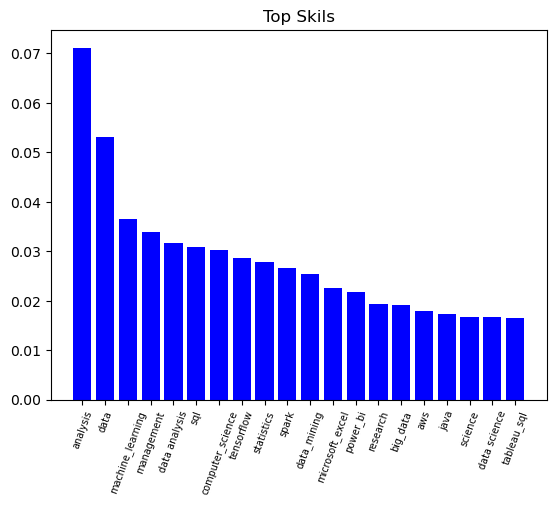

In [35]:
import matplotlib.pyplot as plt
plt.bar(featureArray[tfidfSorting][:20],averageTfidfScores[tfidfSorting][:20],color='blue')
plt.xticks(rotation=70,size=7)
plt.title("Top Skils")
plt.show()

In [36]:
df["Analysis"]=None
df["Machine Learning"]=None
df["SQL"]=None
df["Computer Science"]=None
df["Deep Learning"]=None
df["Big Data/Spark"]=None
df["Visualization Tool"]=None
df["Data Science"]=None

In [37]:
df["Analysis"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("analysis")!=-1 else 0,axis=1)
def machineLearningFix(row):
    if row.lower().find("machine learning")!=-1 or row.lower().find("ml")!=-1:
        return 1
    else:
        return 0
df["Machine Learning"]=df.apply(lambda x: machineLearningFix(x["Job Description"]),axis=1)
df["SQL"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("sql")!=-1 else 0,axis=1)
df["Computer Science"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("computer science")!=-1 else 0,axis=1)
def deepLearningFix(row):
    if row.lower().find("deep learning")!=-1 or row.lower().find("tensorflow")!=-1 or row.lower().find("pytorch")!=-1 or row.lower().find("keras")!=-1 or row.lower().find("scipy")!=-1:
        return 1
    else:
        return 0
df["Deep Learning"]=df.apply(lambda x: deepLearningFix(x["Job Description"]),axis=1)
df["Big Data/Spark"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("big data")!=-1 or x["Job Description"].lower().find("spark")!=-1 or x["Job Description"].lower().find("hadoop")!=-1 else 0,axis=1)
df["Big Data/Spark"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("big data")!=-1 or x["Job Description"].lower().find("spark")!=-1 or x["Job Description"].lower().find("hadoop")!=-1 else 0,axis=1)
df["Visualization Tool"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("power bi")!=-1 or x["Job Description"].lower().find("bi")!=-1 or x["Job Description"].lower().find("tableau")!=-1 else 0,axis=1)
df["Data Science"]=df.apply(lambda x: 1 if x["Job Description"].lower().find("data science")!=-1 else 0,axis=1)


In [38]:
def extract_experience(description):
    # Regex to capture digits or words representing numbers followed by 'year(s)' or 'experience'
    pattern = r'(?:(?:\b\d+\b|\bone\b|\btwo\b|\bthree\b|\bfour\b|\bfive\b|\bsix\b|\bseven\b|\beight\b|\bnine\b|\bten\b)\s+(?:year|years|experience|minimum))'
    matches = re.findall(pattern, description.lower())
    dic={"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"ten":10}
    try:
        result= matches[0].split(' ')[0]
        try:
            ans= int(result)
        except:
            ans= int(dic[result])
        if ans<20:
            return ans
        else:
            return -1
    except:
        return -1
df["Experience"]=processedDescription.apply(extract_experience)
df[df["Experience"]!=-1]
df["Grade Required"]=df["Experience"].apply(lambda x: 0 if x==-1 else 1)

In [39]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Analysis,Machine Learning,SQL,Computer Science,Deep Learning,Big Data/Spark,Visualization Tool,Data Science,Experience,Grade Required
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,...,0,0,1,0,0,0,0,1,3,1
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,...,0,1,0,0,0,0,0,1,1,1
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,...,0,1,0,0,0,1,0,0,-1,0
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,...,0,1,0,0,0,0,0,0,-1,0
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,...,0,1,0,1,0,0,0,0,-1,0


# Age of Company

In [40]:
def companyAge(year):
    if year=="--" or year=="-1":
        return int(-1)
    else:
        return 2024-int(year)
df["Company Age"]=df["Founded"].apply(companyAge)

# Size of Company

In [41]:
df["Size"].unique()

array(['51 to 200 Employees', '10000+ Employees',
       '1001 to 5000 Employees', '1 to 50 Employees', 'Unknown',
       '501 to 1000 Employees', '201 to 500 Employees', '-1',
       '5001 to 10000 Employees'], dtype=object)

# Type of ownership

In [42]:
df["Type of ownership"].unique()

array(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       '-1', 'College / University', 'Government', 'Unknown',
       'Subsidiary or Business Segment', 'Private Practice / Firm',
       'Hospital', 'School / School District', 'Self-employed'],
      dtype=object)

# Industry

In [43]:
df["Industry"].unique()

array(['Information Technology Support Services',
       'General Merchandise & Superstores', 'Machinery Manufacturing',
       'Enterprise Software & Network Solutions', 'Business Consulting',
       'Computer Hardware Development', 'Research & Development',
       'HR Consulting', 'Telecommunications Services',
       'Insurance Carriers', 'Health Care Services & Hospitals',
       'Sports & Recreation', 'Internet & Web Services',
       'Civic & Social Services', '-1', 'Other Retail Stores',
       'Colleges & Universities', 'Hotels & Resorts',
       'Advertising & Public Relations', 'Real Estate',
       'Software Development', 'Banking & Lending',
       'Insurance Agencies & Brokerages',
       'Consumer Product Manufacturing', 'Biotech & Pharmaceuticals',
       'National Agencies', 'Transportation Equipment Manufacturing',
       'Beauty & Personal Accessories Stores',
       'Department, Clothing & Shoe Stores', '--', 'Aerospace & Defense',
       'Construction', 'Financial T

# Sector

In [44]:
df["Sector"].unique()

array(['Information Technology', 'Retail & Wholesale', 'Manufacturing',
       'Management & Consulting', 'Human Resources & Staffing',
       'Telecommunications', 'Insurance', 'Healthcare',
       'Arts, Entertainment & Recreation', 'Nonprofit & NGO', '-1',
       'Education', 'Hotels & Travel Accommodation',
       'Media & Communication', 'Real Estate', 'Financial Services',
       'Pharmaceutical & Biotechnology',
       'Government & Public Administration', '--', 'Aerospace & Defense',
       'Construction, Repair & Maintenance Services',
       'Restaurants & Food Service', 'Legal',
       'Transportation & Logistics', 'Energy, Mining & Utilities',
       'Personal Consumer Services'], dtype=object)

# Revenue

In [45]:
df["Revenue"].unique()

array(['$5 to $25 million (USD)', 'Unknown / Non-Applicable',
       '$500 million to $1 billion (USD)', '$10+ billion (USD)',
       '$1 to $5 billion (USD)', '$25 to $100 million (USD)',
       '$100 to $500 million (USD)', '-1', '$5 to $10 billion (USD)',
       'Less than $1 million (USD)'], dtype=object)

# Some Salaries not provided??

In [46]:
df["Average Salary"]=df["Average Salary"].apply(lambda x:None if x==-1 else x)

In [47]:
print("Employeer didn't provide any salary:",len(df[df["Average Salary"]==None]))

Employeer didn't provide any salary: 0


In [48]:
df["Refined Job Title"][df["Average Salary"]==None].unique()

array([], dtype=object)

In [49]:
dic=dict(df.groupby("Refined Job Title")["Average Salary"].mean())
df["Average Salary"]=df["Average Salary"].fillna(df["Refined Job Title"].map(dic))

In [50]:
dic

{'Applied Scientist': 192000.0,
 'Artifical Intelligence': 186808.51063829788,
 'Business Development': 187875.0,
 'Data Analyst': 148013.4126984127,
 'Data Engineer': 180658.41584158415,
 'Data Governance/Compliance': 158000.0,
 'Data Scientist': 170494.8872180451,
 'Deep Learning': 224000.0,
 'Finance': 179500.0,
 'Leadership/Executive Management': 199950.0,
 'Machine Learning': 168727.27272727274,
 'Marketing Related': 170250.0,
 'Research': 190000.0,
 'Statistician': 100603.33333333333,
 'Strategy/Consulting': 167500.0,
 'Teaching': 161785.7142857143,
 'Technical Management': 209000.0,
 'Unknown': 138125.0}

In [51]:
print("Employeer didn't provide any salary:",len(df[df["Average Salary"]==None]))

Employeer didn't provide any salary: 0


In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'URL', 'Glassdoor Estimate',
       'Employeer Estimate', 'Per Hour', 'Minimum Salary', 'Maximum Salary',
       'Average Salary', 'State', 'Refined Job Title', 'Seniority', 'Analysis',
       'Machine Learning', 'SQL', 'Computer Science', 'Deep Learning',
       'Big Data/Spark', 'Visualization Tool', 'Data Science', 'Experience',
       'Grade Required', 'Company Age'],
      dtype='object')

# Finalizing

In [53]:
df.to_csv("Data Science Jobs preprocessed.csv")